<a href="https://colab.research.google.com/github/kushitha1/ML/blob/main/LSTMStockpredictionyfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas-datareader==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from pandas_datareader import DataReader
import yfinance as yf
from datetime import datetime

In [ ]:
tech_list=['AAPL','GOOG','MSFT','AMZN']


In [ ]:
end=datetime.now()
start=datetime(end.year -1 ,end.month,end.day)

In [ ]:
end

datetime.datetime(2022, 8, 27, 5, 44, 41, 508274)

In [ ]:
start

datetime.datetime(2021, 8, 27, 0, 0)

In [ ]:
for stock in tech_list:
  globals()[stock]=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stock

'AMZN'

In [ ]:

company_list=[AAPL,GOOG,MSFT,AMZN]#symbol present in yfinance
company_name=["Apple","Google","Microsoft","Amazon"]#Actul company name
for company,com_name in zip(company_list,company_name):
  company['company_name']=com_name


In [ ]:
df=pd.concat(company_list,axis=0)

In [ ]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-08-22,135.720001,136.320007,132.850006,133.220001,133.220001,50461500,Amazon
2022-08-23,133.410004,134.990005,132.949997,133.619995,133.619995,36252100,Amazon
2022-08-24,132.750000,135.470001,132.100006,133.800003,133.800003,38627000,Amazon
2022-08-25,135.259995,137.419998,134.279999,137.279999,137.279999,37496300,Amazon
2022-08-26,136.550003,137.830002,130.500000,130.750000,130.750000,53253100,Amazon


In [ ]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-08-27,147.479996,148.750000,146.830002,148.600006,147.771957,55802400,Apple
2021-08-30,149.000000,153.490005,148.610001,153.119995,152.266754,90956700,Apple
2021-08-31,152.660004,152.800003,151.289993,151.830002,150.983963,86453100,Apple
2021-09-01,152.830002,154.979996,152.339996,152.509995,151.660156,80313700,Apple
2021-09-02,153.869995,154.720001,152.399994,153.649994,152.793808,71115500,Apple


In [ ]:
AMZN.head(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-08-27,166.661499,167.615997,165.687500,167.481506,167.481506,48048000,Amazon
2021-08-30,167.871506,172.250000,167.761002,171.078506,171.078506,63844000,Amazon
2021-08-31,171.240005,173.628998,169.779495,173.539505,173.539505,87128000,Amazon
2021-09-01,174.820007,176.350006,173.761993,173.949997,173.949997,72598000,Amazon
2021-09-02,174.738007,175.598007,172.750000,173.156006,173.156006,58474000,Amazon


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,157.951309,159.962976,156.141984,158.142778,157.644789,8.811215e+07
std,12.682969,12.684803,12.551357,12.602675,12.572965,2.647635e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,4.100000e+07
25%,147.897499,149.414993,146.515003,148.382500,147.767662,6.937820e+07
50%,158.780006,161.010002,155.889999,158.240005,157.788673,8.248645e+07
75%,169.232502,171.057503,167.220001,168.970005,168.630116,1.002058e+08
max,182.630005,182.940002,179.119995,182.009995,181.259933,1.954327e+08


In [ ]:
ma_days=[10,20,50]
for ma in ma_days:
  for company in company_list:
    column_name=f'MA FOR {ma} DAYS'
    company[column_name]=company['Close'].rolling(ma).mean()


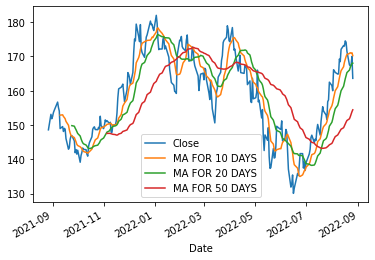

In [ ]:
AAPL[['Close','MA FOR 10 DAYS','MA FOR 20 DAYS','MA FOR 50 DAYS']].plot()

In [ ]:
data=AAPL.filter(['Close'])

In [ ]:
data

,Close
Date,
2021-08-27,148.600006
2021-08-30,153.119995
2021-08-31,151.830002
2021-09-01,152.509995
2021-09-02,153.649994
...,...
2022-08-22,167.570007
2022-08-23,167.229996
2022-08-24,167.529999


In [ ]:
dataset=data.values

In [ ]:
dataset

array([[148.6000061 ],
       [153.11999512],
       [151.83000183],
       [152.50999451],
       [153.6499939 ],
       [154.30000305],
       [156.69000244],
       [155.11000061],
       [154.07000732],
       [148.97000122],
       [149.55000305],
       [148.11999512],
       [149.02999878],
       [148.78999329],
       [146.05999756],
       [142.94000244],
       [143.42999268],
       [145.8500061 ],
       [146.83000183],
       [146.91999817],
       [145.36999512],
       [141.91000366],
       [142.83000183],
       [141.5       ],
       [142.6499939 ],
       [139.13999939],
       [141.11000061],
       [142.        ],
       [143.28999329],
       [142.8999939 ],
       [142.80999756],
       [141.50999451],
       [140.91000366],
       [143.75999451],
       [144.83999634],
       [146.55000305],
       [148.75999451],
       [149.25999451],
       [149.47999573],
       [148.69000244],
       [148.63999939],
       [149.32000732],
       [148.8500061 ],
       [152

In [ ]:
training_data_len=int(np.ceil(len(dataset)*.95))

In [ ]:
dataset.shape

(252, 1)

In [ ]:
training_data_len

240

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [ ]:
scaled_data[:5]

array([[0.3568818 ],
       [0.44388833],
       [0.41905689],
       [0.43214626],
       [0.45409043]])

In [ ]:
train_data=scaled_data[0:int(training_data_len),:]

In [ ]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [ ]:
print(x_train[:5])

[array([0.3568818 , 0.44388833, 0.41905689, 0.43214626, 0.45409043,
       0.46660264, 0.5126084 , 0.4821945 , 0.46217538, 0.36400394,
       0.37516856, 0.34764194, 0.36515885, 0.36053892, 0.30798847,
       0.24793081, 0.25736277, 0.30394628, 0.3228105 , 0.32454286,
       0.29470642, 0.22810408, 0.24581338, 0.2202118 , 0.24234836,
       0.17478349, 0.21270459, 0.22983644, 0.25466788, 0.24716068,
       0.24542831, 0.22040419, 0.2088548 , 0.26371507, 0.28450432,
       0.31742072, 0.35996146, 0.3695861 , 0.37382097, 0.35861417,
       0.35765164, 0.37074131, 0.36169412, 0.43330146, 0.37998088,
       0.36381155, 0.38421574, 0.41251221, 0.40231011, 0.40846973,
       0.39230041, 0.39942255, 0.34379214, 0.34282962, 0.38363829,
       0.38383068, 0.40307996, 0.45101077, 0.53532241, 0.58691063]), array([0.44388833, 0.41905689, 0.43214626, 0.45409043, 0.46660264,
       0.5126084 , 0.4821945 , 0.46217538, 0.36400394, 0.37516856,
       0.34764194, 0.36515885, 0.36053892, 0.30798847, 0.24

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(180, 60)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(180, 60, 1)

In [ ]:
#build the model
from keras.models import Sequential
from keras.layers import Dense, LSTM
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(16,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 25)                425       
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 121,603
Trainable params: 121,603
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
model.fit(x_train,y_train,batch_size=2,epochs=1)

90/90 [==============================] - 10s 64ms/step - loss: 0.0427


In [ ]:
test_data=scaled_data[training_data_len-60:,:]

In [ ]:
test_data.shape

(72, 1)

In [ ]:
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
type(x_test)

list

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions=model.predict(x_test)

In [ ]:
predictions=scaler.inverse_transform(predictions)

In [ ]:
predictions

array([[167.43608],
       [168.32275],
       [169.20468],
       [170.09389],
       [170.97629],
       [171.84998],
       [172.6933 ],
       [173.45291],
       [174.05612],
       [174.48001],
       [174.73535],
       [174.87593]], dtype=float32)

In [ ]:
y_test

array([[168.49000549],
       [172.1000061 ],
       [173.19000244],
       [173.02999878],
       [174.55000305],
       [174.1499939 ],
       [171.52000427],
       [167.57000732],
       [167.22999573],
       [167.52999878],
       [170.02999878],
       [163.61999512]])

In [ ]:
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [ ]:
rmse

5.304587078677603

In [ ]:
training_data_len

240

In [ ]:
dataset.shape

(252, 1)

In [ ]:
train=data[:training_data_len]

In [ ]:
valid=data[training_data_len:]

In [ ]:
valid.head()

,Close
Date,
2022-08-11,168.490005
2022-08-12,172.100006
2022-08-15,173.190002
2022-08-16,173.029999
2022-08-17,174.550003


In [ ]:
valid['prediction']=predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
valid.head(5)

,Close,prediction
Date,,
2022-08-11,168.490005,167.436081
2022-08-12,172.100006,168.322754
2022-08-15,173.190002,169.204681
2022-08-16,173.029999,170.093887
2022-08-17,174.550003,170.976288


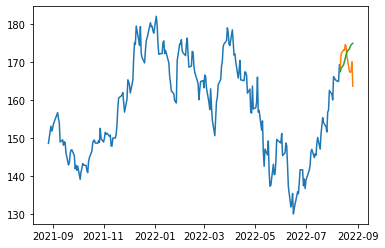

In [ ]:

plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])